<a href="https://colab.research.google.com/github/rajeevfromkrec/machine_Learning/blob/master/Churn_analysis_and_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/treselle-systems/customer_churn_analysis.git

Cloning into 'customer_churn_analysis'...
remote: Enumerating objects: 5, done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 5
Unpacking objects: 100% (5/5), done.


In [6]:
!ls 


customer_churn_analysis  sample_data  Telco-Customer-Churn.csv


In [4]:
!cp ./customer_churn_analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv  ./Telco-Customer-Churn.csv

In [5]:
!ls

customer_churn_analysis  sample_data  Telco-Customer-Churn.csv


In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
columns= df.columns

binary_columns= []

for column in columns:
  if(df[column].value_counts().shape[0]==2):
    binary_columns.append(column)

In [20]:
binary_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

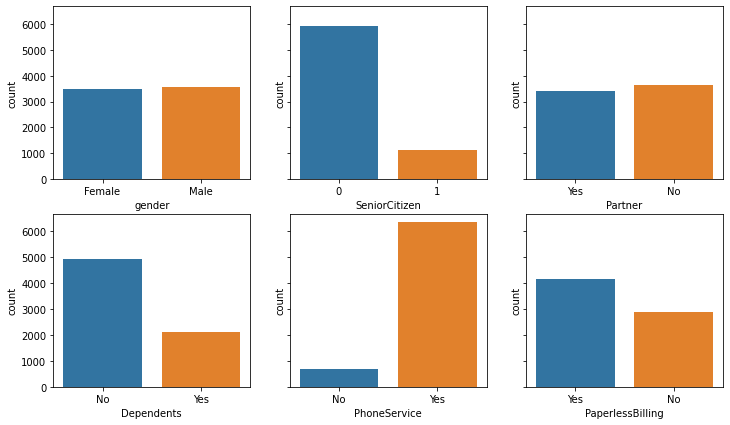

In [25]:
fig,axes=plt.subplots(2,3,figsize=(12,7),sharey=True)

sns.countplot('gender',data=df,ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])


In [28]:
churn_numeric= {'Yes':1,'No':0}
df.Churn.replace(churn_numeric,inplace=True)

In [30]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [37]:
df[['gender','Churn']].groupby(['gender']).sum()

,Churn
gender,
Female,939
Male,930


In [38]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).sum()

,Churn
SeniorCitizen,
0,1393
1,476


In [40]:
df[['Dependents','Churn']].groupby(['Dependents']).sum()

,Churn
Dependents,
No,1543
Yes,326


In [41]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).sum()

,Churn
PaperlessBilling,
No,469
Yes,1400


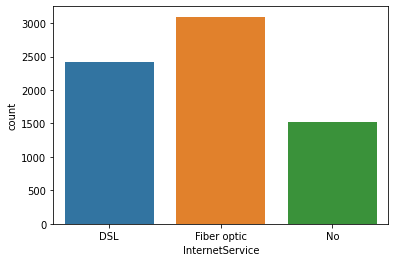

In [42]:
sns.countplot("InternetService", data=df)

In [44]:
df[['InternetService','Churn']].groupby(['InternetService']).sum()

,Churn
InternetService,
DSL,459
Fiber optic,1297
No,113


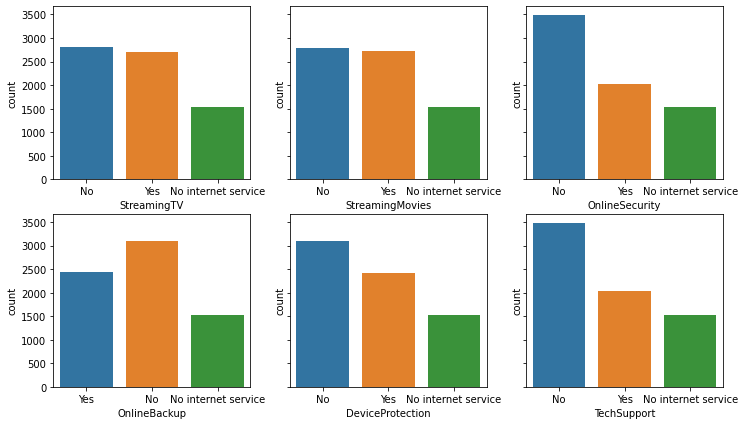

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

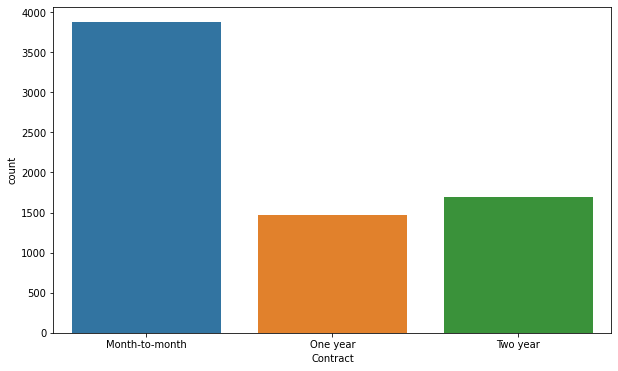

In [46]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)

In [47]:
df[['Contract','Churn']].groupby(['Contract']).sum()

,Churn
Contract,
Month-to-month,1655
One year,166
Two year,48


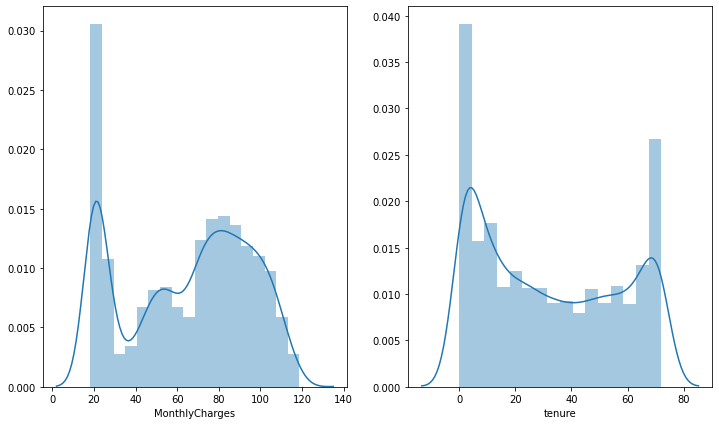

In [49]:
fig,axes= plt.subplots(1,2,figsize=(12,7))

sns.distplot(df['MonthlyCharges'], ax=axes[0])
sns.distplot(df['tenure'], ax=axes[1])

In [51]:
df.drop(['customerID','gender','PhoneService','TotalCharges'], axis=1, inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [53]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity','Contract','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [56]:
scaler= MinMaxScaler()

a= scaler.fit_transform(df[['tenure']])
b= scaler.fit_transform(df[['MonthlyCharges']])

X.tenure=a
X.MonthlyCharges=b

In [57]:
X.shape

(7043, 28)

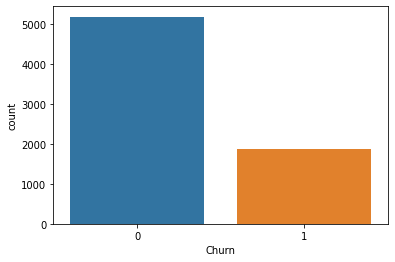

In [58]:
sns.countplot('Churn', data=df)

In [59]:
X_yes= X[X.Churn==1]
X_no= X[X.Churn==0]

In [61]:
X_yes_upsampled=X_yes.sample(n=len(X_no), replace=True,random_state=41)
print(len(X_yes_upsampled))

5174


In [64]:
X_yes_upsampled.shape

(5174, 28)

In [62]:
X_upsampled= X_no.append(X_yes_upsampled).reset_index(drop=True)

In [63]:
X_upsampled.shape

(10348, 28)

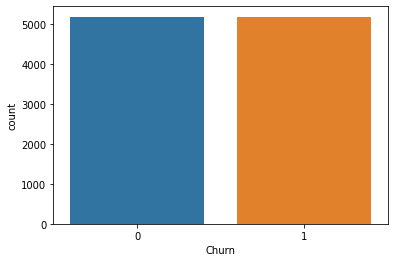

In [66]:
sns.countplot('Churn',data=X_upsampled)

In [67]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) 
y = X_upsampled['Churn'] 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [69]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [70]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [71]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7672143029717323

In [72]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.7628019323671498

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8731577675767094

In [76]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8371980676328502

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {'n_estimators':[150,200,250,300,400], 'max_depth':[15,20,25,30]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [79]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [80]:
clf.best_score_

0.9016237861414066

In [81]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 150}